In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import os
path = os.listdir('C://Users//Tulsi Chopade//Documents//PCCOE//ALL-Seminar//ALL_IDB2//img')
classes = {'healthy':0, 'ALL':1}

In [4]:
import cv2
X = []
Y = []
for cls in classes :
    pth = 'C://Users//Tulsi Chopade//Documents//PCCOE//ALL-Seminar//ALL_IDB2//img//'+cls
    for j in os.listdir(pth) :
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [7]:
np.unique(Y)

array([0, 1])

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
pd.Series(Y).value_counts()

0    130
1    130
dtype: int64

In [7]:
X.shape

(260, 200, 200)

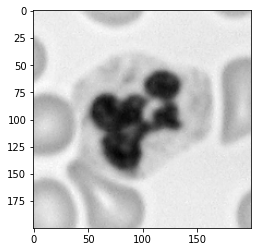

In [9]:
plt.imshow(X[1], cmap='gray')

In [10]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(260, 40000)

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [12]:
xtrain.shape, xtest.shape

((208, 40000), (52, 40000))

In [13]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

202 18
198 20
0.792156862745098 0.07058823529411765
0.7764705882352941 0.0784313725490196


In [14]:
from sklearn.decomposition import PCA

In [15]:
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
pca_train = xtrain
pca_test = xtest

(208, 40000) (52, 40000)


In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(xtrain,ytrain)
y_pred=clf.predict(xtest)

In [18]:
print("Training Score:", clf.score(xtrain, ytrain))
print("Testing Score:", clf.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.8269230769230769


In [19]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.8269230769230769


In [20]:
dec = {0:'healthy' , 1:'ALL'}

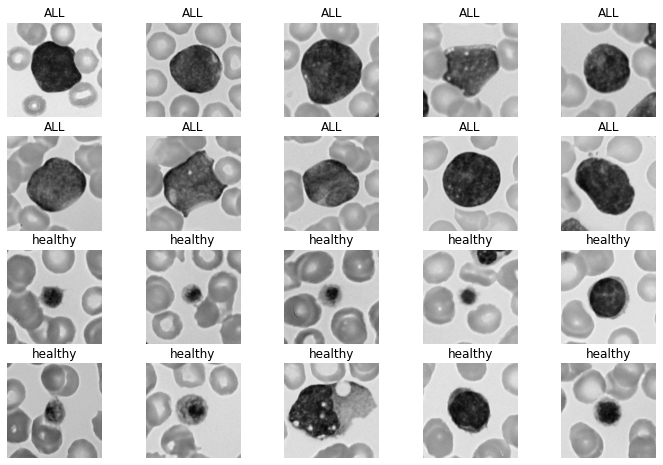

In [21]:
plt.figure(figsize=(12,8))
p = os.listdir('C://Users//Tulsi Chopade//Documents//PCCOE//ALL-Seminar//ALL_IDB2//')
c=1
for i in os.listdir('C://Users//Tulsi Chopade//Documents//PCCOE//ALL-Seminar//ALL_IDB2//img//Test//')[:20]:
    plt.subplot(4,5,c)

    img = cv2.imread('C://Users//Tulsi Chopade//Documents//PCCOE//ALL-Seminar//ALL_IDB2//img//Test//'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = clf.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1